Start

In [280]:
#Importing needed modules .
from pandas import read_csv , get_dummies , DataFrame , concat , plotting
from matplotlib.pyplot import show , bar , xlabel , ylabel , title 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error
#Instancing from LabelEncoder and StandardScaler objects .
encoder = LabelEncoder()
scaler = StandardScaler()

In [281]:
#Reading csv file and getting ten samples randomly .
path = "D:\\datasets\\Students post scores predict\\test_scores.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
157,CIMBB,Urban,Non-public,A33,Standard,19.0,GXVKS,Male,Does not qualify,60.0,69.0
549,GJJHK,Suburban,Public,X78,Standard,21.0,1X80E,Female,Does not qualify,59.0,64.0
2055,ZOWMK,Urban,Public,Q0E,Experimental,30.0,FDPKM,Male,Qualifies for reduced/free lunch,37.0,52.0
416,DNQDD,Suburban,Public,ST7,Standard,20.0,JMTOQ,Male,Qualifies for reduced/free lunch,53.0,68.0
629,GOKXL,Rural,Public,ENO,Experimental,22.0,HCOHF,Male,Does not qualify,56.0,72.0
1569,UKPGS,Suburban,Public,PGH,Experimental,23.0,OA330,Male,Does not qualify,70.0,90.0
906,IDGFP,Urban,Non-public,P2A,Experimental,17.0,NWT24,Male,Does not qualify,80.0,95.0
58,CCAAW,Suburban,Non-public,2B1,Experimental,18.0,YEJFP,Female,Does not qualify,68.0,79.0
1206,OJOBU,Rural,Public,FS3,Standard,19.0,RD5O5,Male,Does not qualify,61.0,75.0
659,GOKXL,Rural,Public,TSA,Experimental,23.0,R4P1G,Male,Qualifies for reduced/free lunch,48.0,70.0


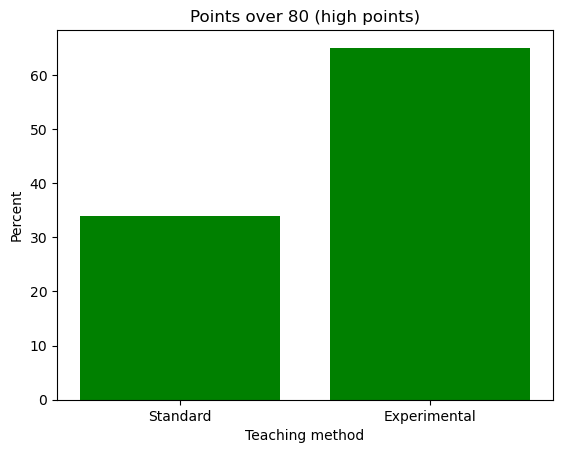

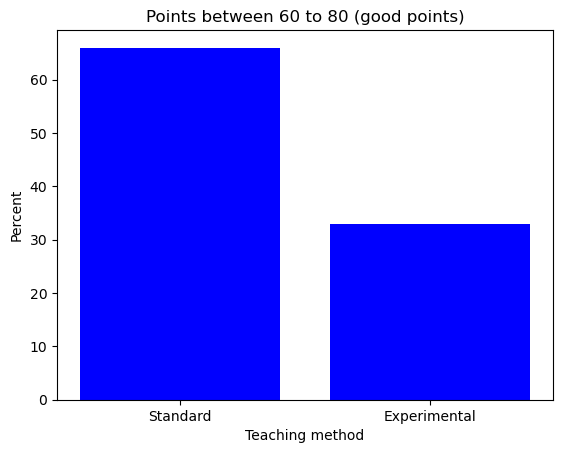

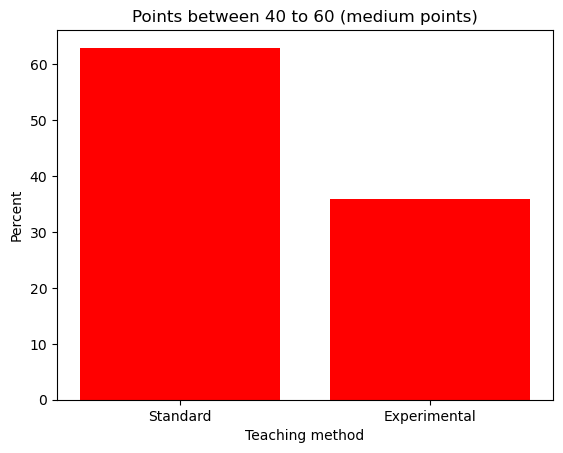

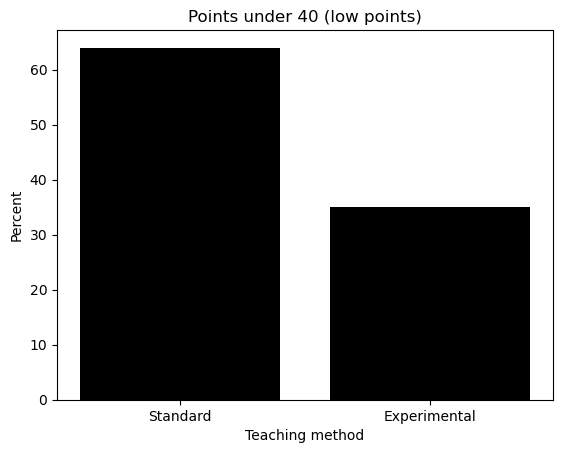

In [282]:
#Distributing points to four batches and finding out percent of each teaching method in that batch .
methods_grades = df[['teaching_method','posttest']].to_numpy().tolist()
v80_100 = [p for p in methods_grades if p[1]>80]
v60_80 = [p for p in methods_grades if 80>=p[1]>60]
v40_60 = [p for p in methods_grades if 600>=p[1]>40]
v_under_40 = [p for p in methods_grades if p[1]>=40]
results = [v80_100,v60_80,v40_60,v_under_40]
Titles = ['Points over 80 (high points)','Points between 60 to 80 (good points)','Points between 40 to 60 (medium points)','Points under 40 (low points)']
colors = ['green','blue','red','black']
for i in range(4) :
    bar(['Standard','Experimental'],[(len([i for i in results[i] if i[0]=='Standard'])*100)//len(results[i]),(len([i for i in results[i] if i[0]=='Experimental'])*100)//len(results[i])],color=colors[i])
    xlabel('Teaching method')
    ylabel('Percent')
    title(Titles[i])
    show()

In [283]:
#There are some columns with string data type 
#that some of them should be encoded by normal encoding and rest of them by one hot encoding.
for col in df.columns :
    print(col)
    print(df[col].value_counts(ascending=False))

school
GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64
school_setting
Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64
school_type
Public        1582
Non-public     551
Name: school_type, dtype: int64
classroom
18K    31
ZBH    30
QA2    30
Q0E    30
YTB    30
       ..
SSP    15
KR1    15
IQN    15
JGD    14
197    14
Name: classroom, Length: 97, dtype: int64
teaching_method
Standard        1373
Experimental     760
Name: teaching_method, dtype: int64
n_student
22.0    264
21.0    231
27.0    189
28.0    168
20.0    160
30.0    150
24.0    144
23.0    138
17.0    136
19.0    133
25.0    125
18.0     72
16.0     64
15.0     45
31.0     31
29.0     29
14.0     28
26.0     26
Name:

In [284]:
#Getting information from data set .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [285]:
#Seperating points .
label = df.posttest
#school and classroom columns have many uniqe values , so normal encoding is better for them .
school = DataFrame(encoder.fit_transform(df.school),columns=['school'])
classroom = DataFrame(encoder.fit_transform(df.classroom),columns=['classroom'])
#Dropping points , school ,classroom and student_id columns .
df = df.drop(['posttest','student_id','school','classroom'],axis=1)

In [286]:
#Seperating columns with numeric data type and non-numeric data type .
nan_df = df.drop([col for col in df if df[col].dtype!='O'],axis=1)
encoded_nan_df = get_dummies(nan_df)
num_df = df.drop(nan_df.columns,axis=1)

In [287]:
#Assembling  all prepared columns in a data frame and scaling them .
ready_df = concat([num_df,encoded_nan_df,school,classroom],axis=1)
scaled_df = DataFrame(scaler.fit_transform(ready_df),columns=ready_df.columns)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   n_student                               2133 non-null   float64
 1   pretest                                 2133 non-null   float64
 2   school_setting_Rural                    2133 non-null   float64
 3   school_setting_Suburban                 2133 non-null   float64
 4   school_setting_Urban                    2133 non-null   float64
 5   school_type_Non-public                  2133 non-null   float64
 6   school_type_Public                      2133 non-null   float64
 7   teaching_method_Experimental            2133 non-null   float64
 8   teaching_method_Standard                2133 non-null   float64
 9   gender_Female                           2133 non-null   float64
 10  gender_Male                             2133 non-null   floa

In [288]:
#Evaluating corelation coefficent relatives between numeric data frame and points .
test_df = df[['n_student','pretest']]
test_df['class'] = label
test_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7260\57831812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['class'] = label


,n_student,pretest,class
0,20.0,62.0,72.0
1,20.0,66.0,79.0
2,20.0,64.0,76.0
3,20.0,61.0,77.0
4,20.0,64.0,76.0


In [289]:
Corr = test_df.corr()
Corr['class'].sort_values(ascending=False)

class        1.000000
pretest      0.950884
n_student   -0.504886
Name: class, dtype: float64

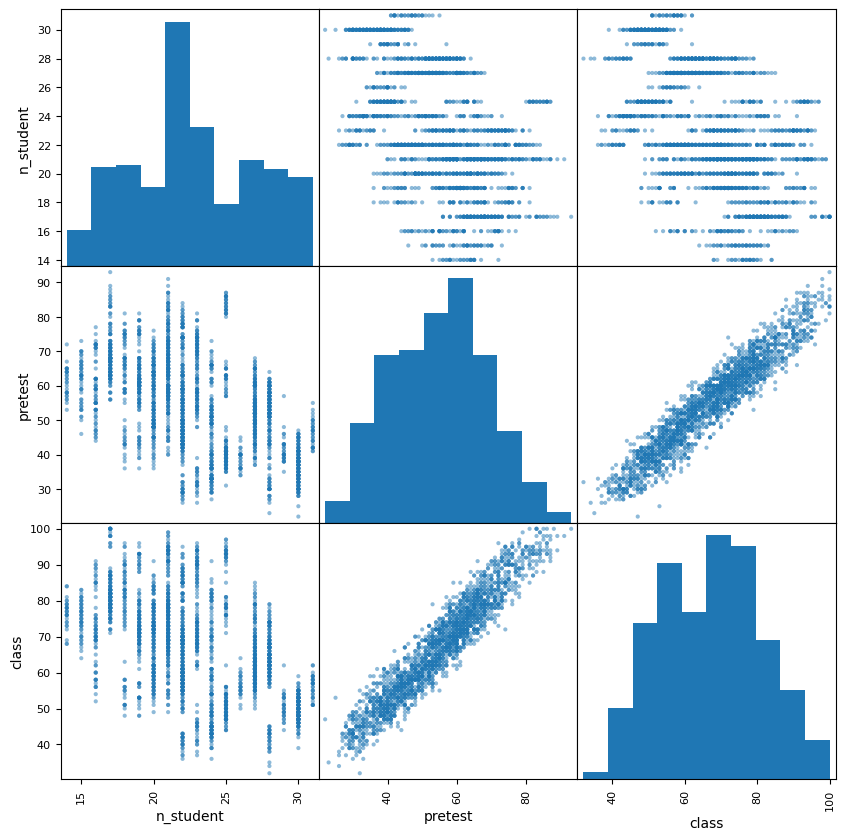

In [290]:
plotting.scatter_matrix(test_df,figsize=(10,10))
show()
#Points and pretest have a perfect regression relation .

In [291]:
#Seperating data set to train and test arrays .
xtr , xts , ytr , yts = train_test_split(scaled_df,label,test_size=0.2,random_state=42)

In [292]:
#Training
model = GradientBoostingRegressor().fit(xtr,ytr)

In [293]:
#Measuring mean absolute error and mean squared error on train datas .
pred_xtr = model.predict(xtr)
print('mean squared error on train samples :')
print(f'{mean_squared_error(ytr,pred_xtr):.2f}')
print('mean absolute error on train samples :')
print(f'{mean_absolute_error(ytr,pred_xtr):.2f}')

mean squared error on train samples :
8.11
mean absolute error on train samples :
2.28


In [294]:
#Measuring mean absolute error and mean squared error on test datas .
pred_xts = model.predict(xts)
print('mean squared error on test samples :')
print(f'{mean_squared_error(yts,pred_xts):.2f}')
print('mean absolute error on test samples :')
print(f'{mean_absolute_error(yts,pred_xts):.2f}')

mean squared error on test samples :
10.29
mean absolute error on test samples :
2.51


In [295]:
#Training with entire datas .
model.fit(scaled_df,label)

GradientBoostingRegressor()

In [296]:
#Measuring mean absolute error and mean squared error on entire datas datas .
pred_df = model.predict(scaled_df)
print('mean squared error on entire datas :')
print(f'{mean_squared_error(label,pred_df):.2f}')
print('mean absolute error on entire datas :')
print(f'{mean_absolute_error(label,pred_df):.2f}')

mean squared error on entire datas :
8.36
mean absolute error on entire datas :
2.29


End